In [83]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ssl

In [84]:
ssl._create_default_https_context = ssl._create_unverified_context
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/var/folders/t7/njhlrdgx7l93zf55hb583glm0000gn/T/ipykernel_18738/1677178622.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde = False, bins = 30)


<Axes: xlabel='total_bill'>

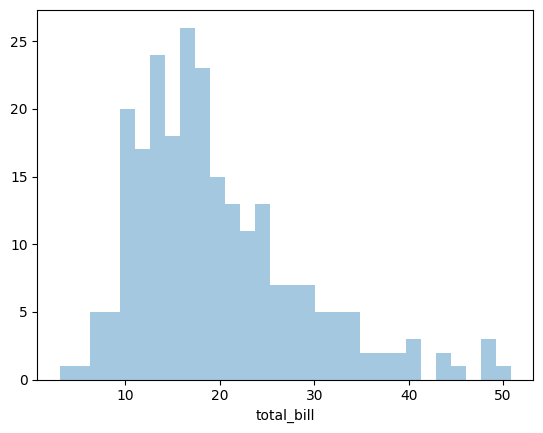

In [85]:
sns.distplot(tips['total_bill'],kde = False, bins = 30)

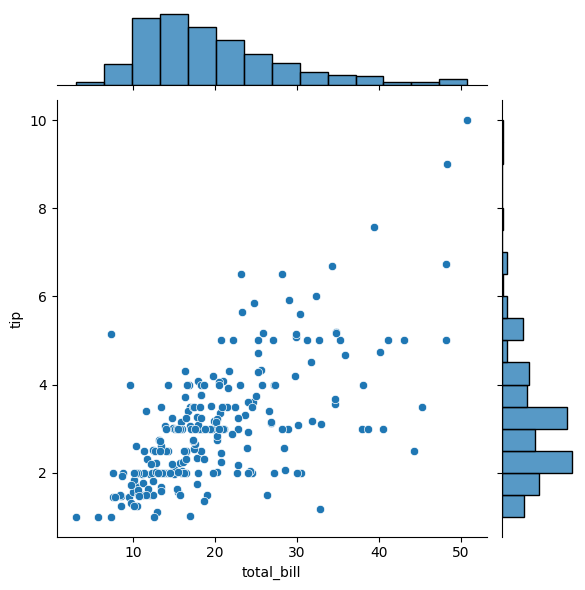

In [86]:
sns.jointplot(x='total_bill',y='tip',data=tips)

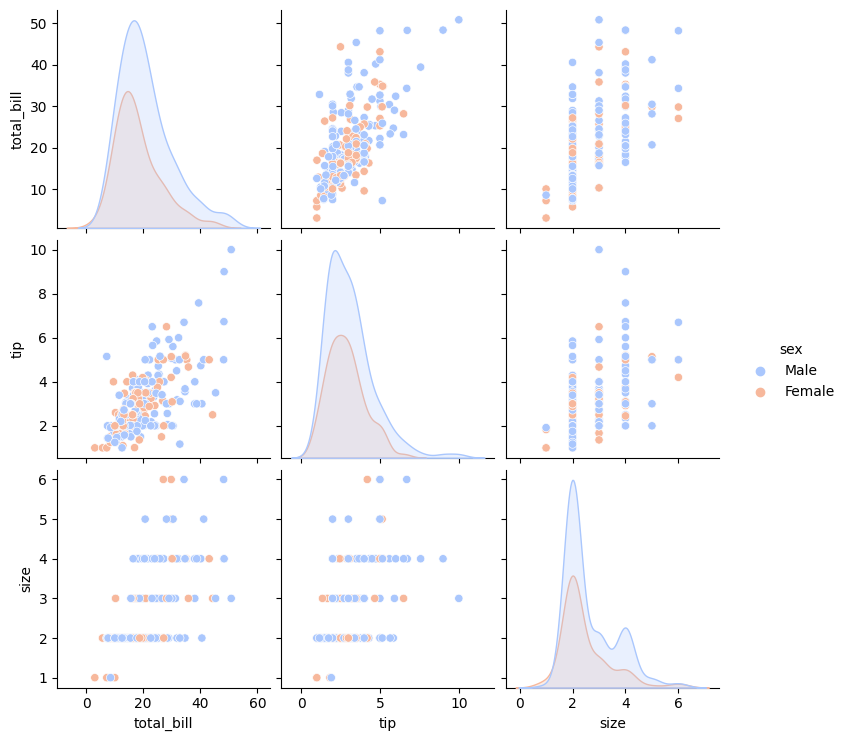

In [87]:
#pairplot will plot pairwise relationships across an entire dataframe
sns.pairplot(tips, hue='sex',palette='coolwarm')

<Axes: xlabel='total_bill'>

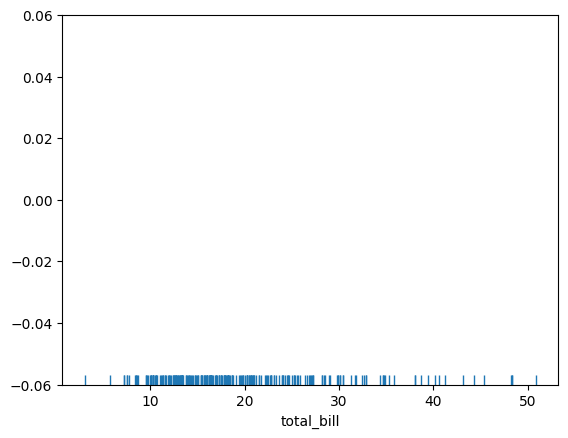

In [88]:

sns.rugplot(tips['total_bill'])

/var/folders/t7/njhlrdgx7l93zf55hb583glm0000gn/T/ipykernel_18738/4271412032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

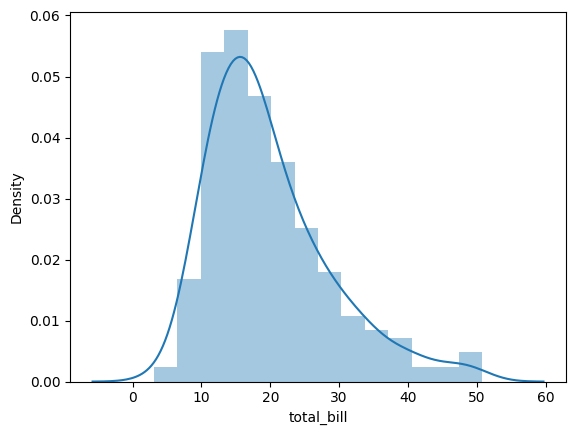

In [89]:
sns.distplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

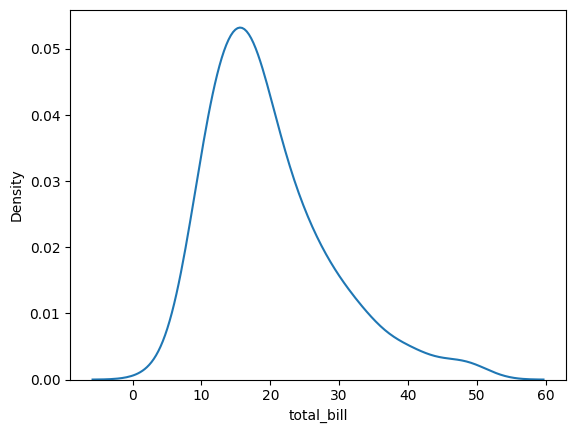

In [90]:
sns.kdeplot(tips['total_bill'])

### CATEGORICAL PLOTS   

<Axes: xlabel='sex', ylabel='total_bill'>

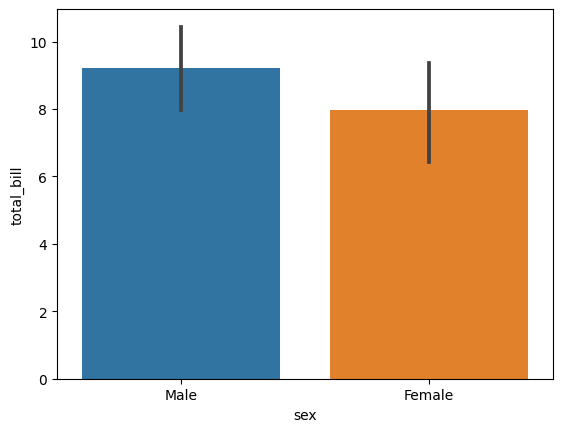

In [91]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

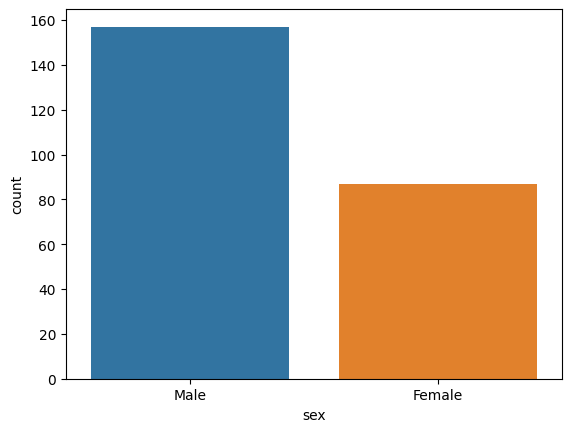

In [92]:
#count plot is similar to bar plot except the estimator is explicitly counting
# The numberof occurences b/c of that we only set the X-value
sns.countplot(x='sex',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

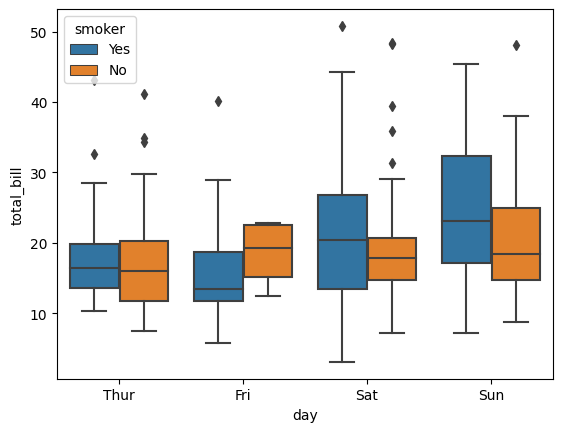

In [93]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

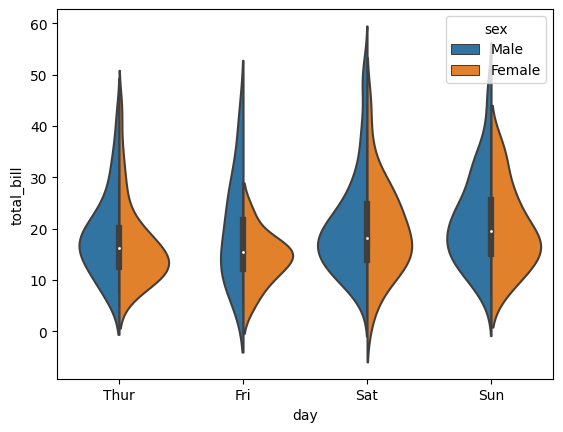

In [94]:
#Unlike the boxplot the violinplot allows us to plot 
#all the components that correspond to datapoints
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

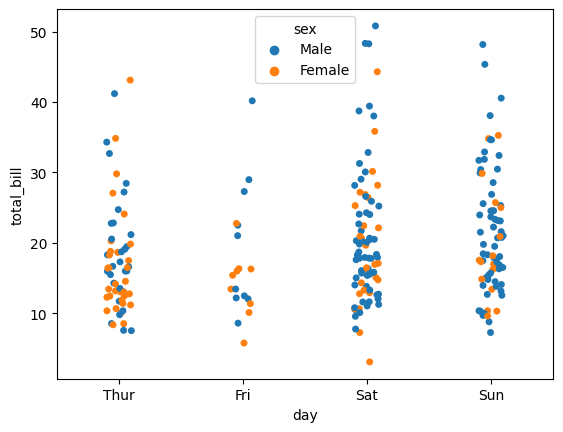

In [95]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True,hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

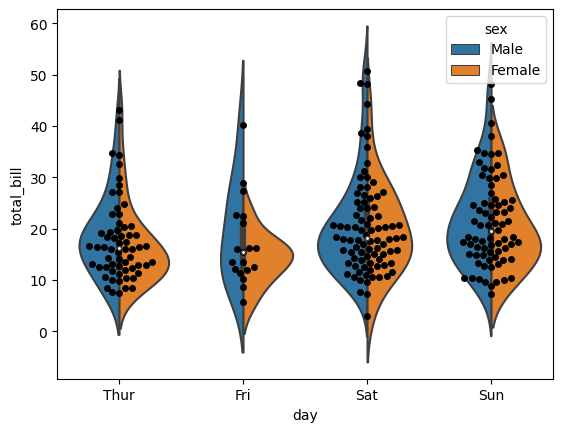

In [96]:
# Not recommended for large datasets
sns.swarmplot(x='day',y='total_bill', data= tips,color='black')
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

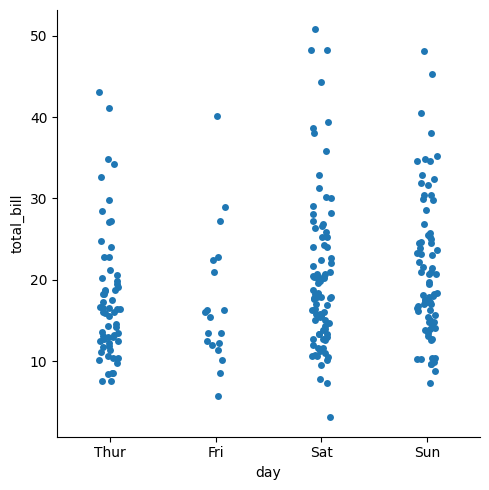

In [97]:
sns.catplot(x='day',y='total_bill',data=tips)

### Seaborn

In [98]:
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [99]:

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [100]:
tc= tips.corr()

/var/folders/t7/njhlrdgx7l93zf55hb583glm0000gn/T/ipykernel_18738/1831818922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc= tips.corr()


<Axes: >

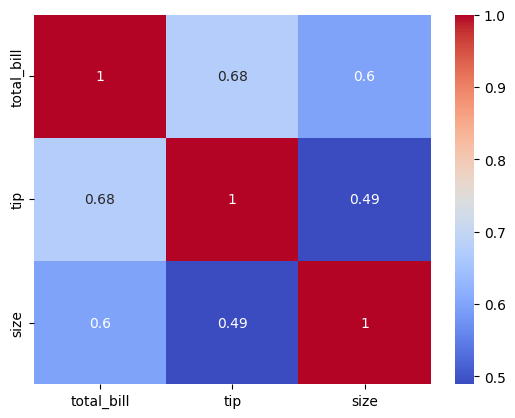

In [101]:
# In order to do a heatmap you need data to be in a corr() frame
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [102]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

<Axes: xlabel='year', ylabel='month'>

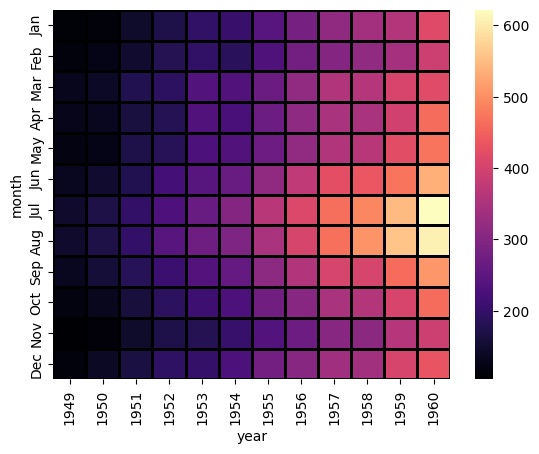

In [103]:
sns.heatmap(fp,cmap = 'magma',linecolor='black',linewidths=1)

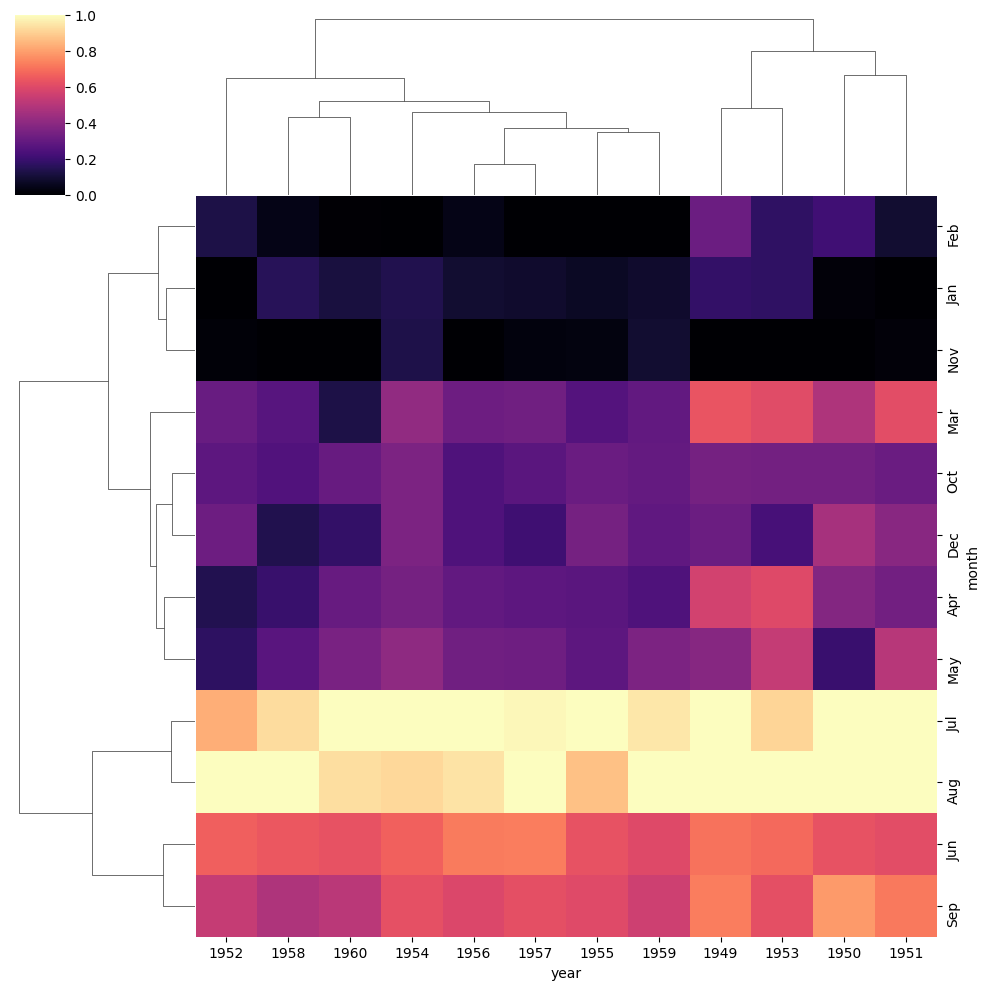

In [104]:
#clusters the data in order of which data is similar to one another
sns.clustermap(fp,cmap='magma',standard_scale=1)

In [105]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

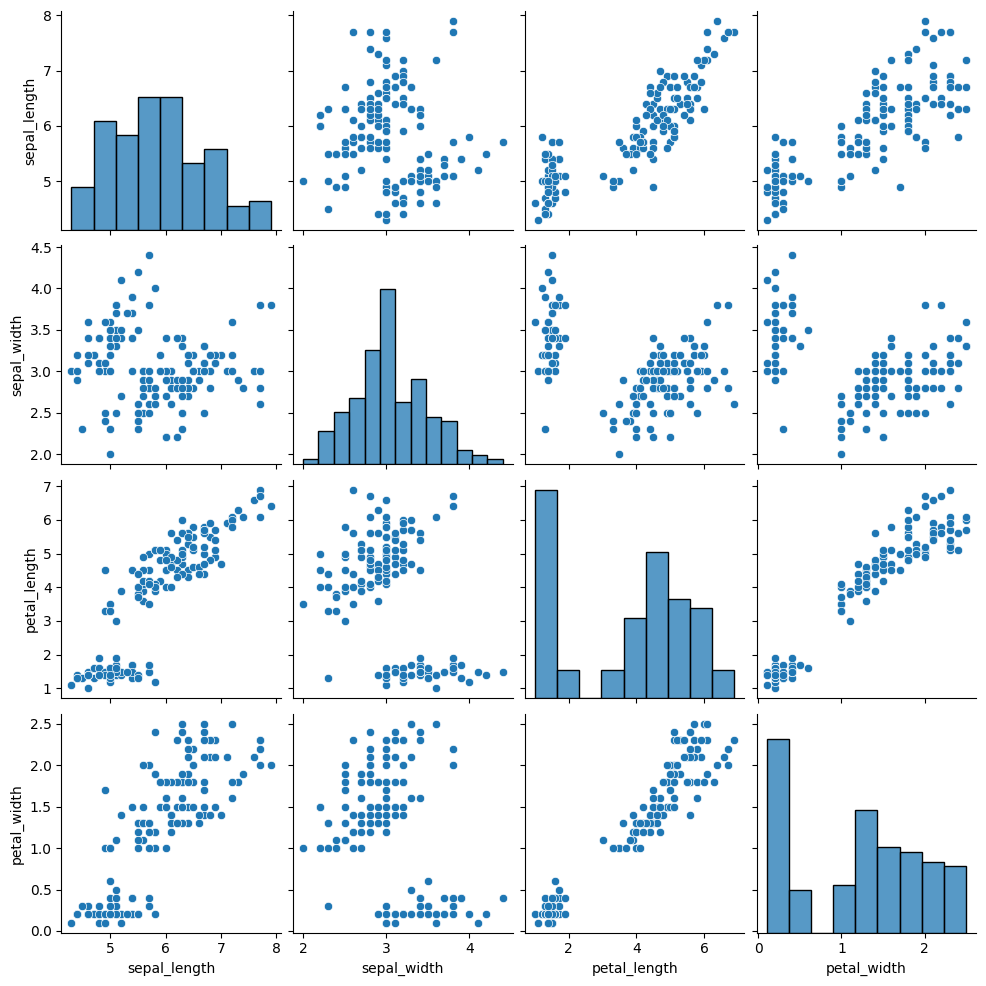

In [107]:
sns.pairplot(iris)

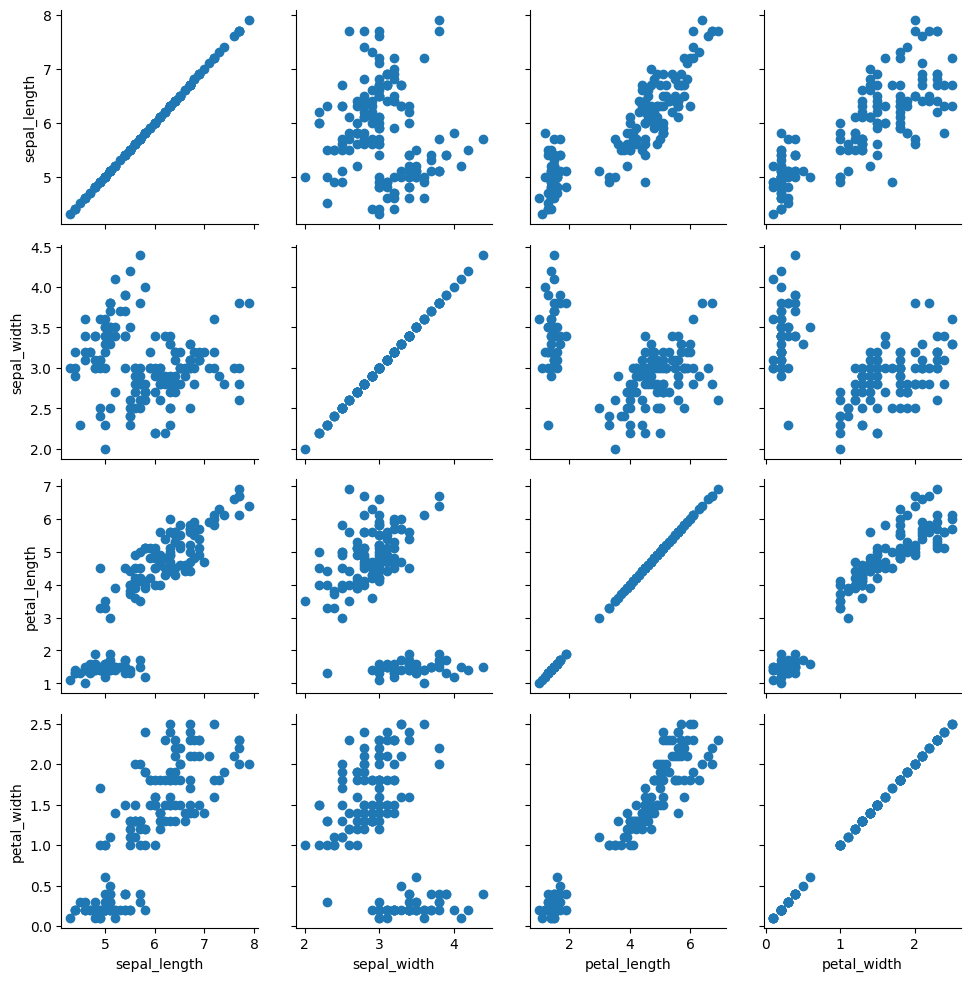

In [108]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

In [109]:

g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g

In [110]:
tips = sns.load_dataset('tips')

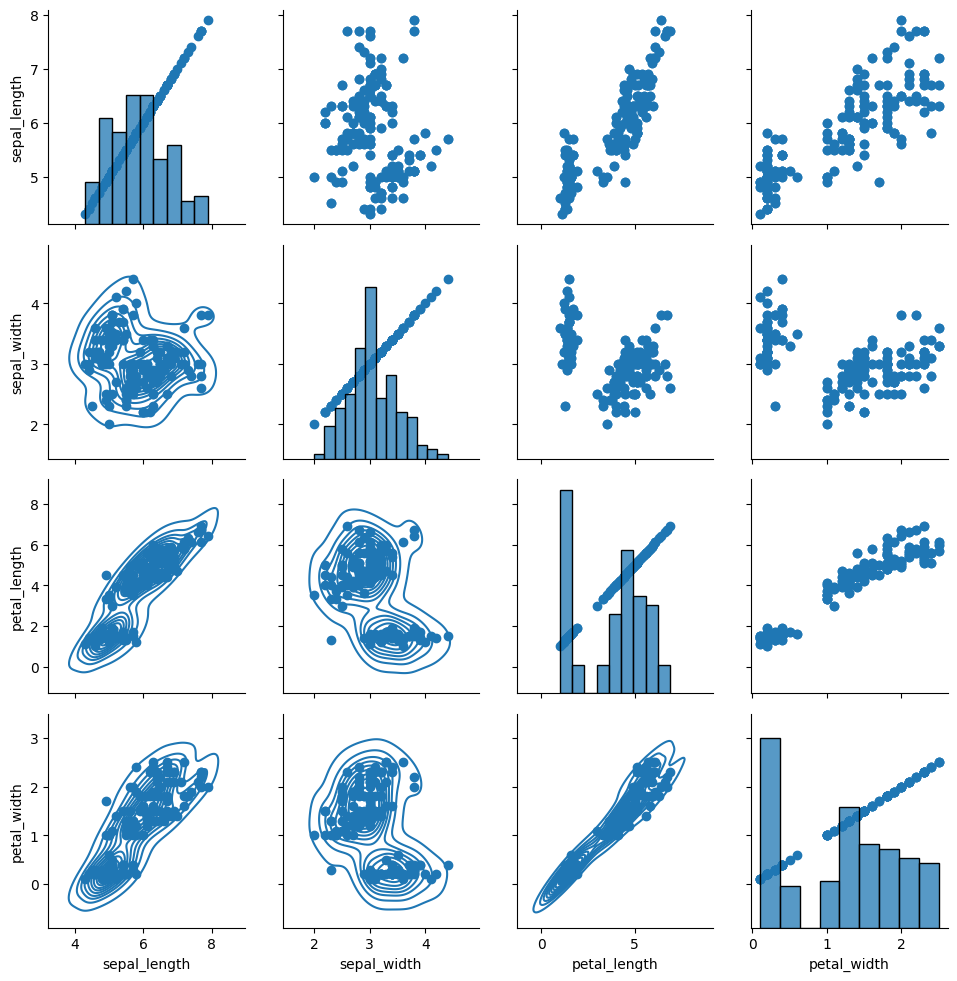

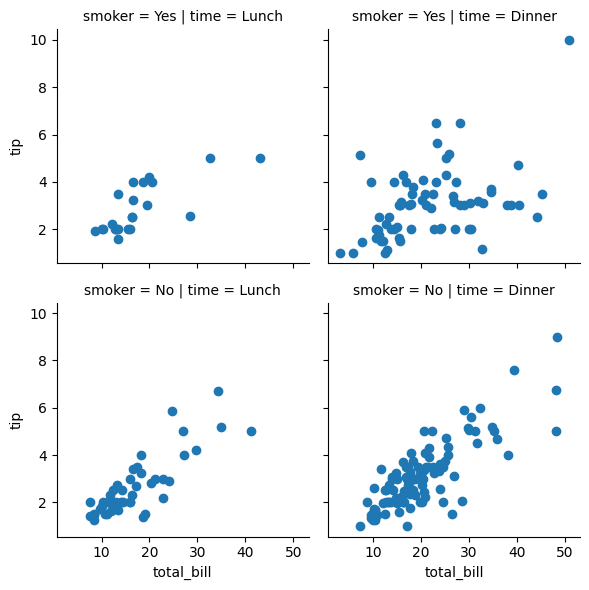

In [111]:
g = sns.FacetGrid(data=tips, col= 'time', row='smoker')
g.map(plt.scatter,'total_bill','tip')

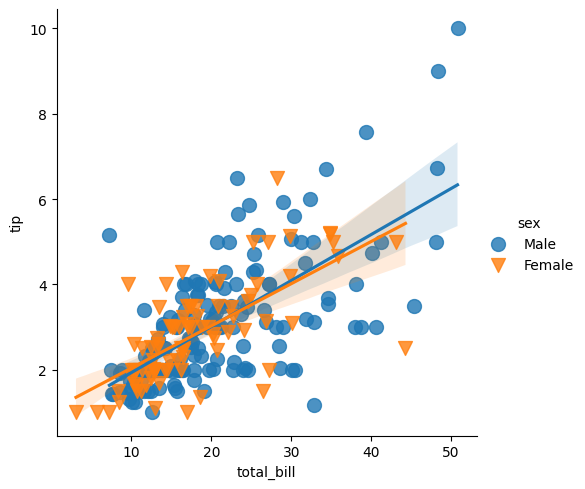

In [112]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
           scatter_kws={'s':100})

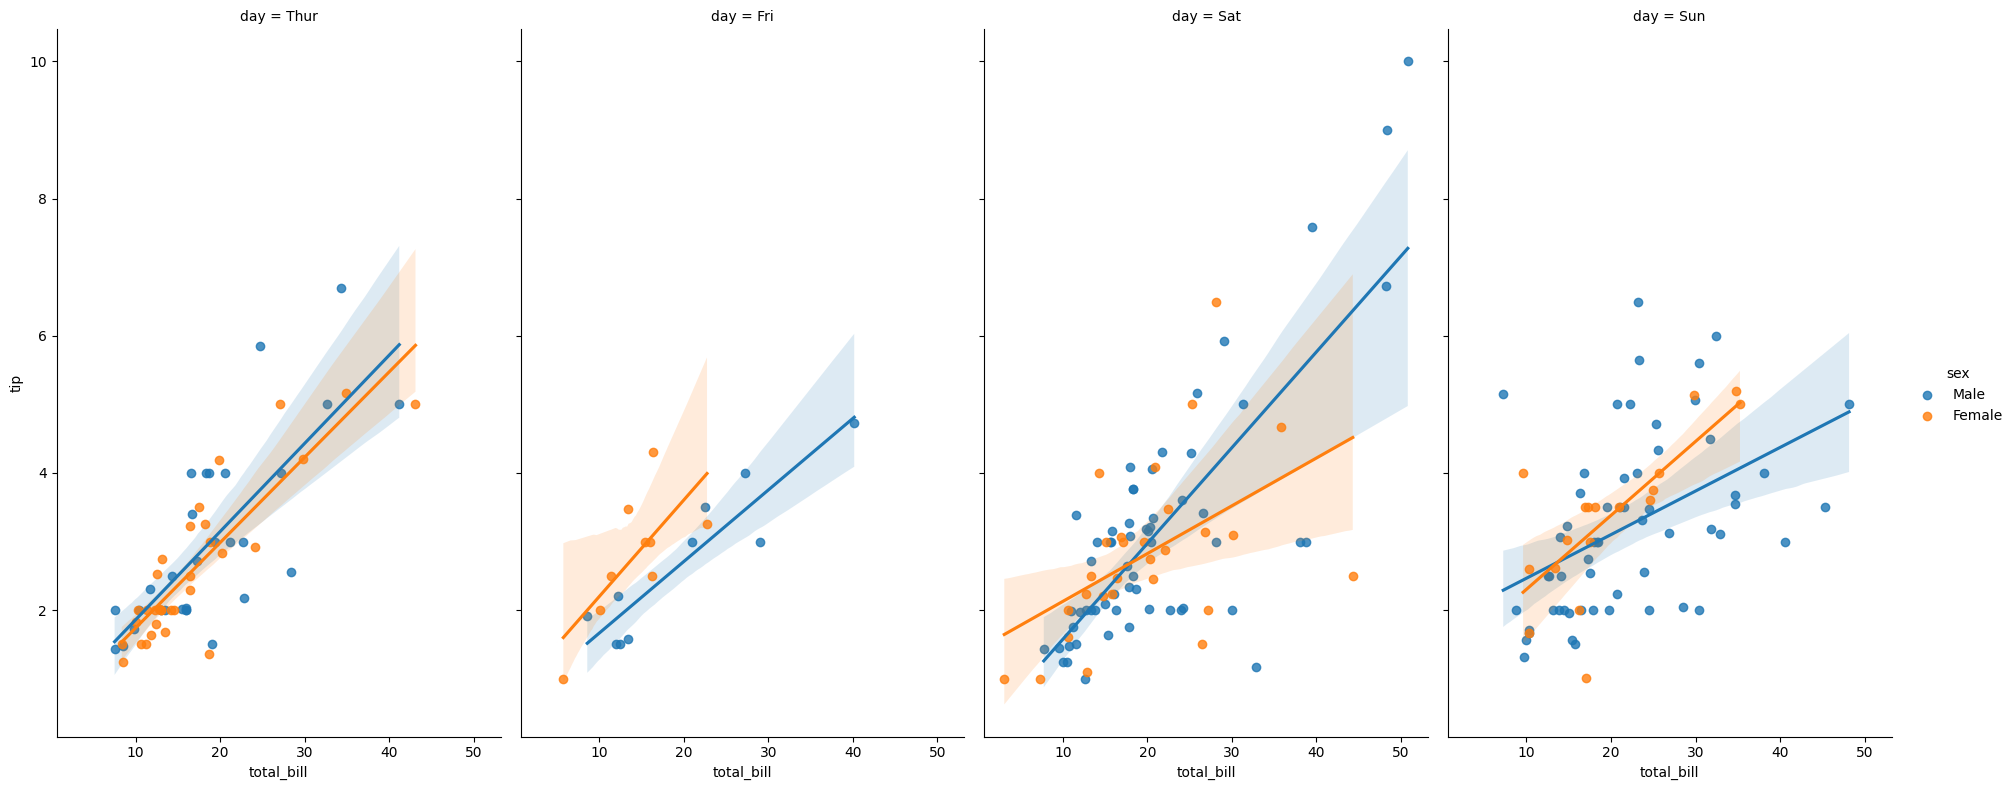

In [116]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect = 0.6, height=8)

## Style and Color

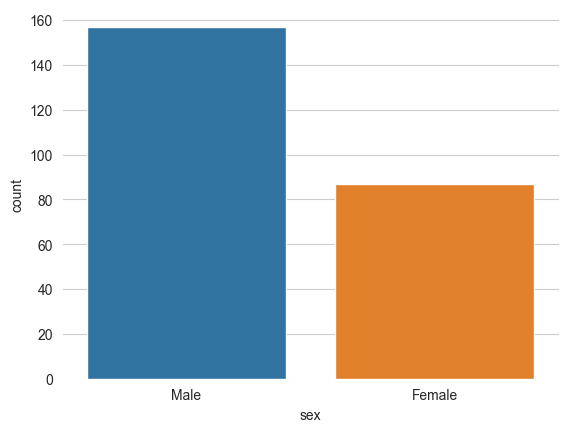

In [124]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True, bottom=True) # removes borders

<Axes: xlabel='sex', ylabel='count'>

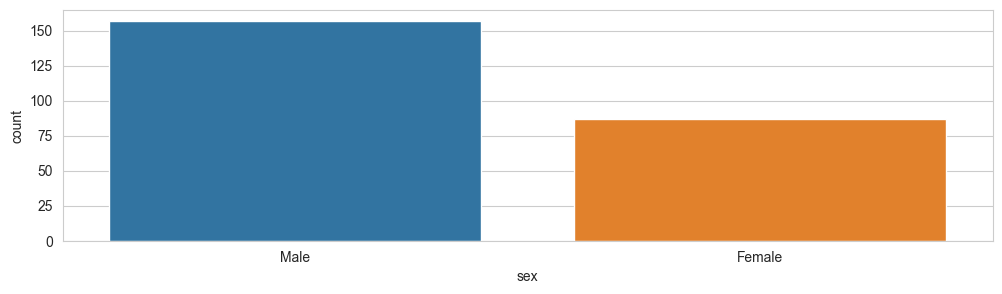

In [125]:
plt.figure(figsize=(12,3)) # this will effect our sns plots
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

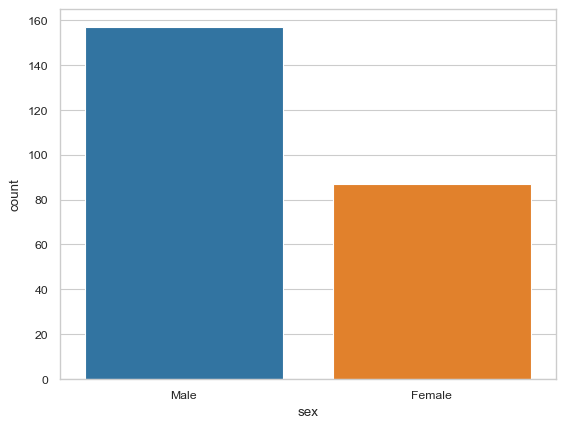

In [134]:
#context parameters: paper, notebook, talk, poster
sns.set_context('paper',font_scale=1)
sns.countplot(x='sex',data=tips)

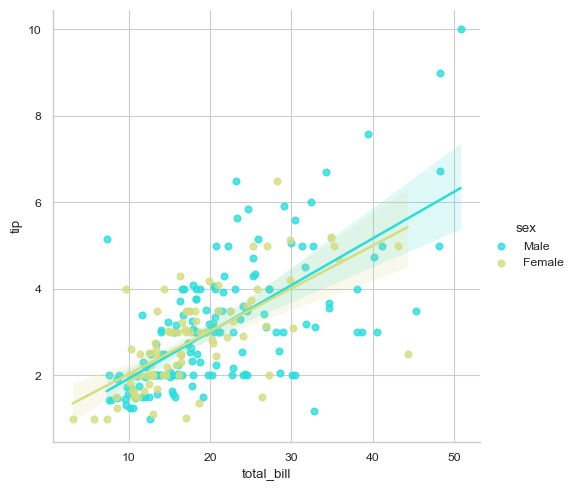

In [137]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='rainbow')